## Notebook Imports

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

## Gather Dataset
[Source: Original research paper](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y)

In [2]:
#Phillipe's lecture dataset('might delete soon' as per warning)
boston_dataset = load_boston()
print(boston_dataset.data.shape)

(506, 13)


/Users/mrsuperb/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

In [3]:
#Getting original data as per warning
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
#data changed to 'boston'
boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]]) 
target = raw_df.values[1::2, 2]

In [4]:
boston_dataset.data.shape

(506, 13)

In [5]:
boston.shape # from now on I will use this original dataset

(506, 13)

In [6]:
dir(boston_dataset)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [7]:
dir(boston)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

In [8]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Data Exploration with Pandas dataframes

In [9]:
#Create a pandas dataframe
data = pd.DataFrame(data=boston_dataset.data,columns=boston_dataset.feature_names)

#Adding price column
data['PRICE']= boston_dataset.target

In [10]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [12]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning data - check for missing values

In [13]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [14]:
#Alternative way
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Visualizing data - Historgram, Distributions and Bar Charts

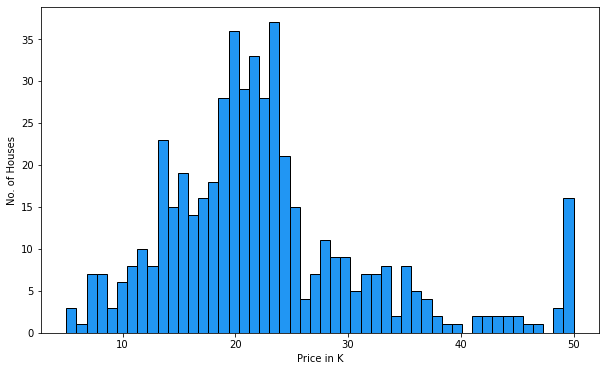

In [18]:
plt.figure(figsize=[10,6])
plt.hist(data['PRICE'],bins=50,ec='black',color='#2196F3')
plt.xlabel('Price in K')
plt.ylabel('No. of Houses')
plt.show()

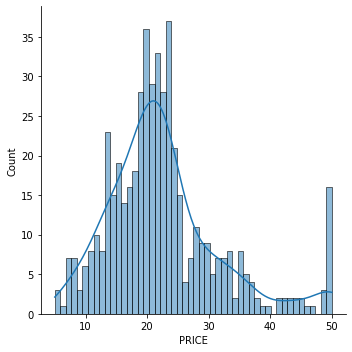

In [19]:
sns.displot(data['PRICE'],kde=True, bins=50)
plt.show()

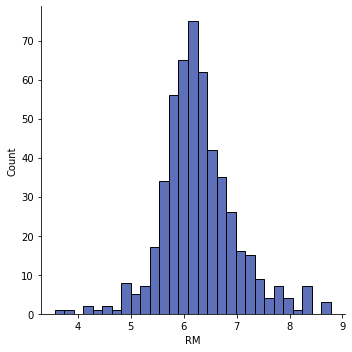

In [20]:
sns.displot(data['RM'], color='#2940a3')
plt.show()

In [21]:
data['RM'].mean()

6.284634387351787

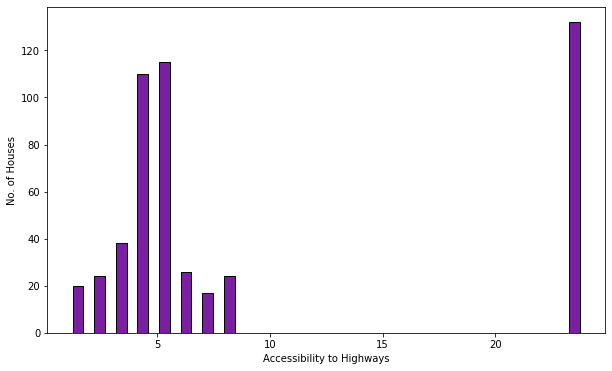

In [22]:
plt.figure(figsize=[10,6])
plt.hist(data['RAD'],ec='black',color='#7b1fa2',bins=24,rwidth = 0.5)
plt.xlabel('Accessibility to Highways')
plt.ylabel('No. of Houses')  
plt.show()

In [23]:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

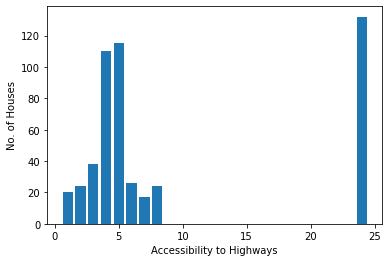

In [24]:
frequency=data['RAD'].value_counts()
#type(frequency)
#frequency.index
#frequency.axes[0]
plt.xlabel('Accessibility to Highways')
plt.ylabel('No. of Houses')
plt.bar(frequency.index, height=frequency)
plt.show()

In [25]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

## Read Descriptive Statistics

In [15]:
print(data['PRICE'].min())
print(data['PRICE'].max())
print(data['PRICE'].mean())
print(data['PRICE'].median())

5.0
50.0
22.532806324110698
21.2


In [16]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation 
## $$\rho_{XY}= corr(X,Y)$$
## $$-1.0\leq \rho_{XY} \leq 1.0$$

In [17]:
data['PRICE'].corr(data['RM'])

0.695359947071539

In [18]:
#Challenge
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375615

In [19]:
data.corr() #Pearson

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [20]:
mask = np.zeros_like(data.corr()) 
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices]=True

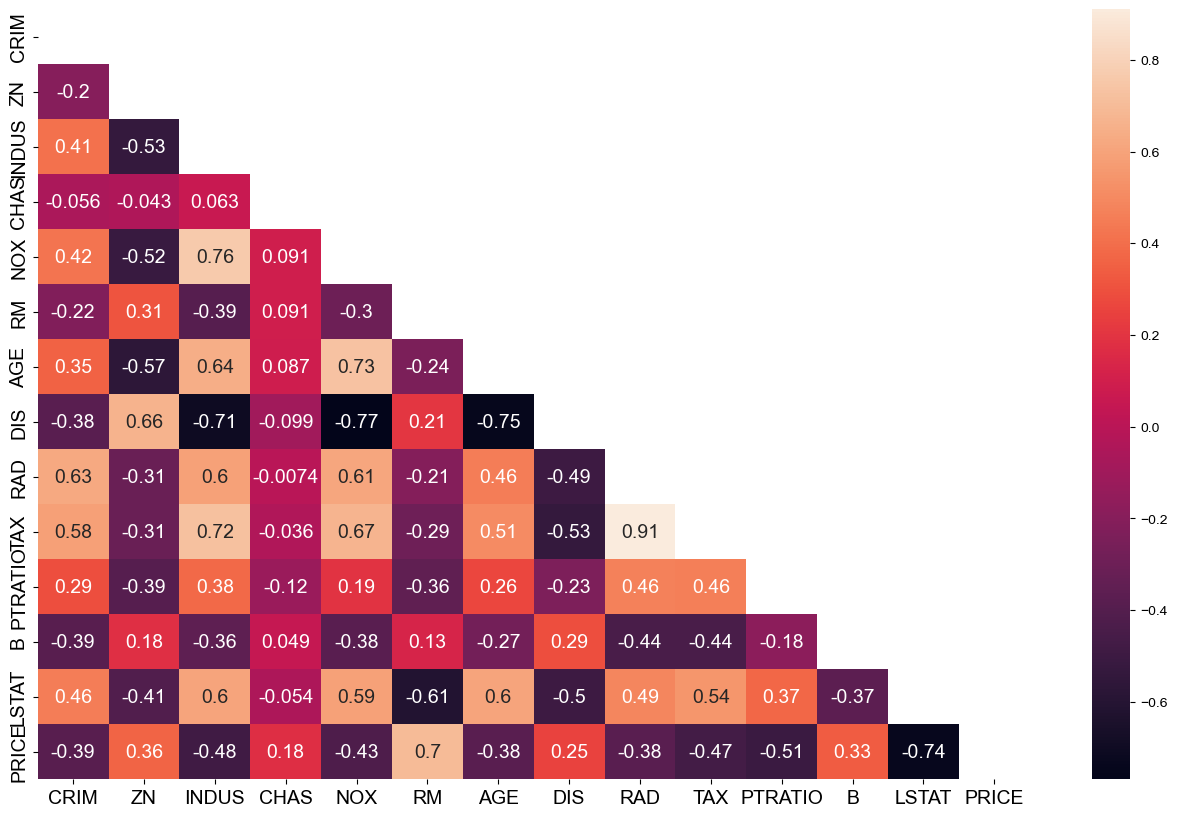

In [21]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),mask=mask,annot=True,annot_kws ={'size':14})
sns.set_style('white')
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

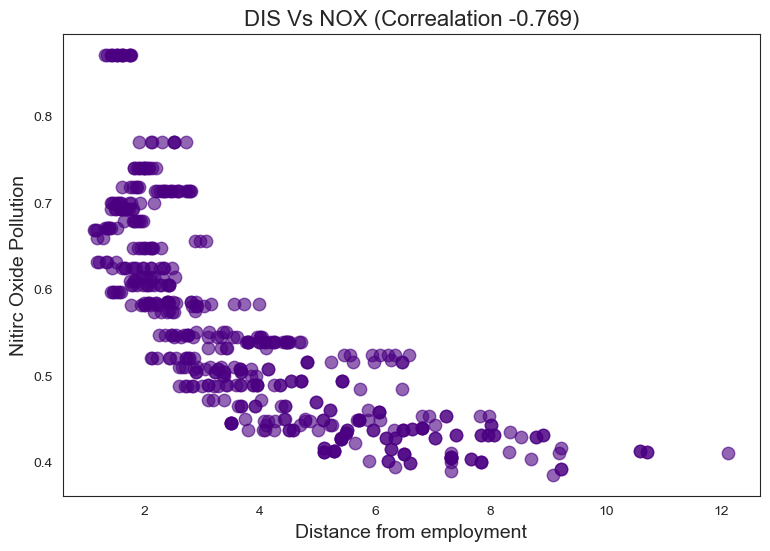

In [22]:
nox_dis_corr = round(data['NOX'].corr(data['DIS']),3)

plt.figure(figsize=(9,6))
plt.scatter(x=data['DIS'],y=data['NOX'], alpha=0.6, s=80,color ='indigo')
plt.title(f'DIS Vs NOX (Correalation {nox_dis_corr})', fontsize = 16)
plt.xlabel('Distance from employment', fontsize = 14)
plt.ylabel('Nitirc Oxide Pollution', fontsize = 14)
plt.show

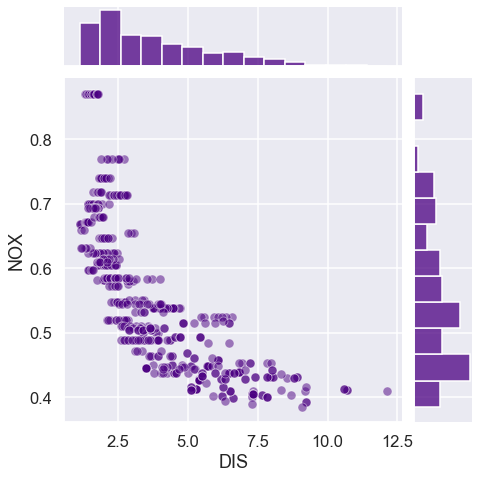

In [34]:
sns.set()
sns.set_context('talk')
sns.set_style('darkgrid')
sns.jointplot(x=data['DIS'],y=data['NOX'], height = 7, color = 'indigo', joint_kws = {'alpha':0.5}) 
plt.show()

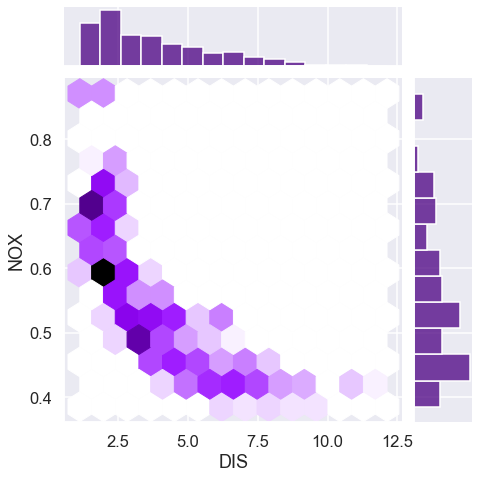

In [35]:
sns.set()
sns.set_context('talk')
sns.set_style('darkgrid')
sns.jointplot(x=data['DIS'],y=data['NOX'], height = 7, color = 'indigo', kind = 'hex') 
plt.show()

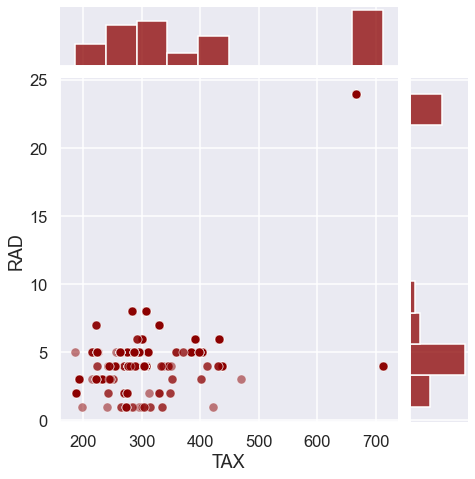

In [36]:
sns.set()
sns.set_context('talk')
sns.set_style('darkgrid')
sns.jointplot(x=data['TAX'],y=data['RAD'], height = 7, color = 'darkred', joint_kws = {'alpha':0.5}) 
plt.show()

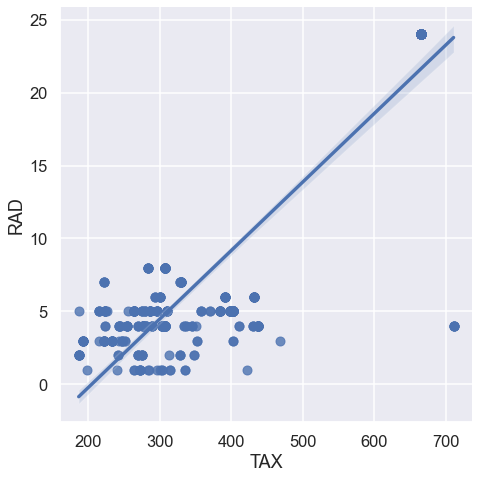

In [37]:
sns.lmplot(x='TAX',y='RAD',data=data,height = 7)
plt.show()

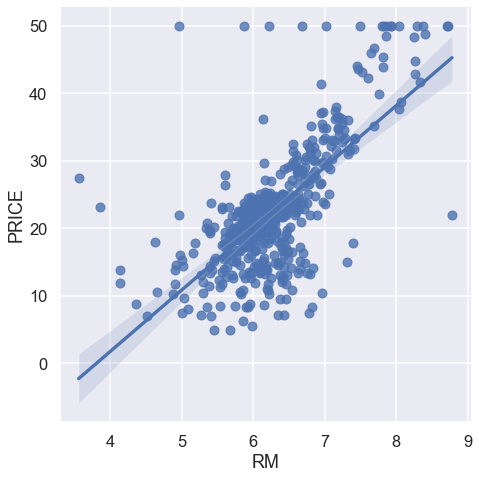

In [38]:
sns.lmplot(x='RM',y='PRICE',data=data,height = 7)
plt.show()

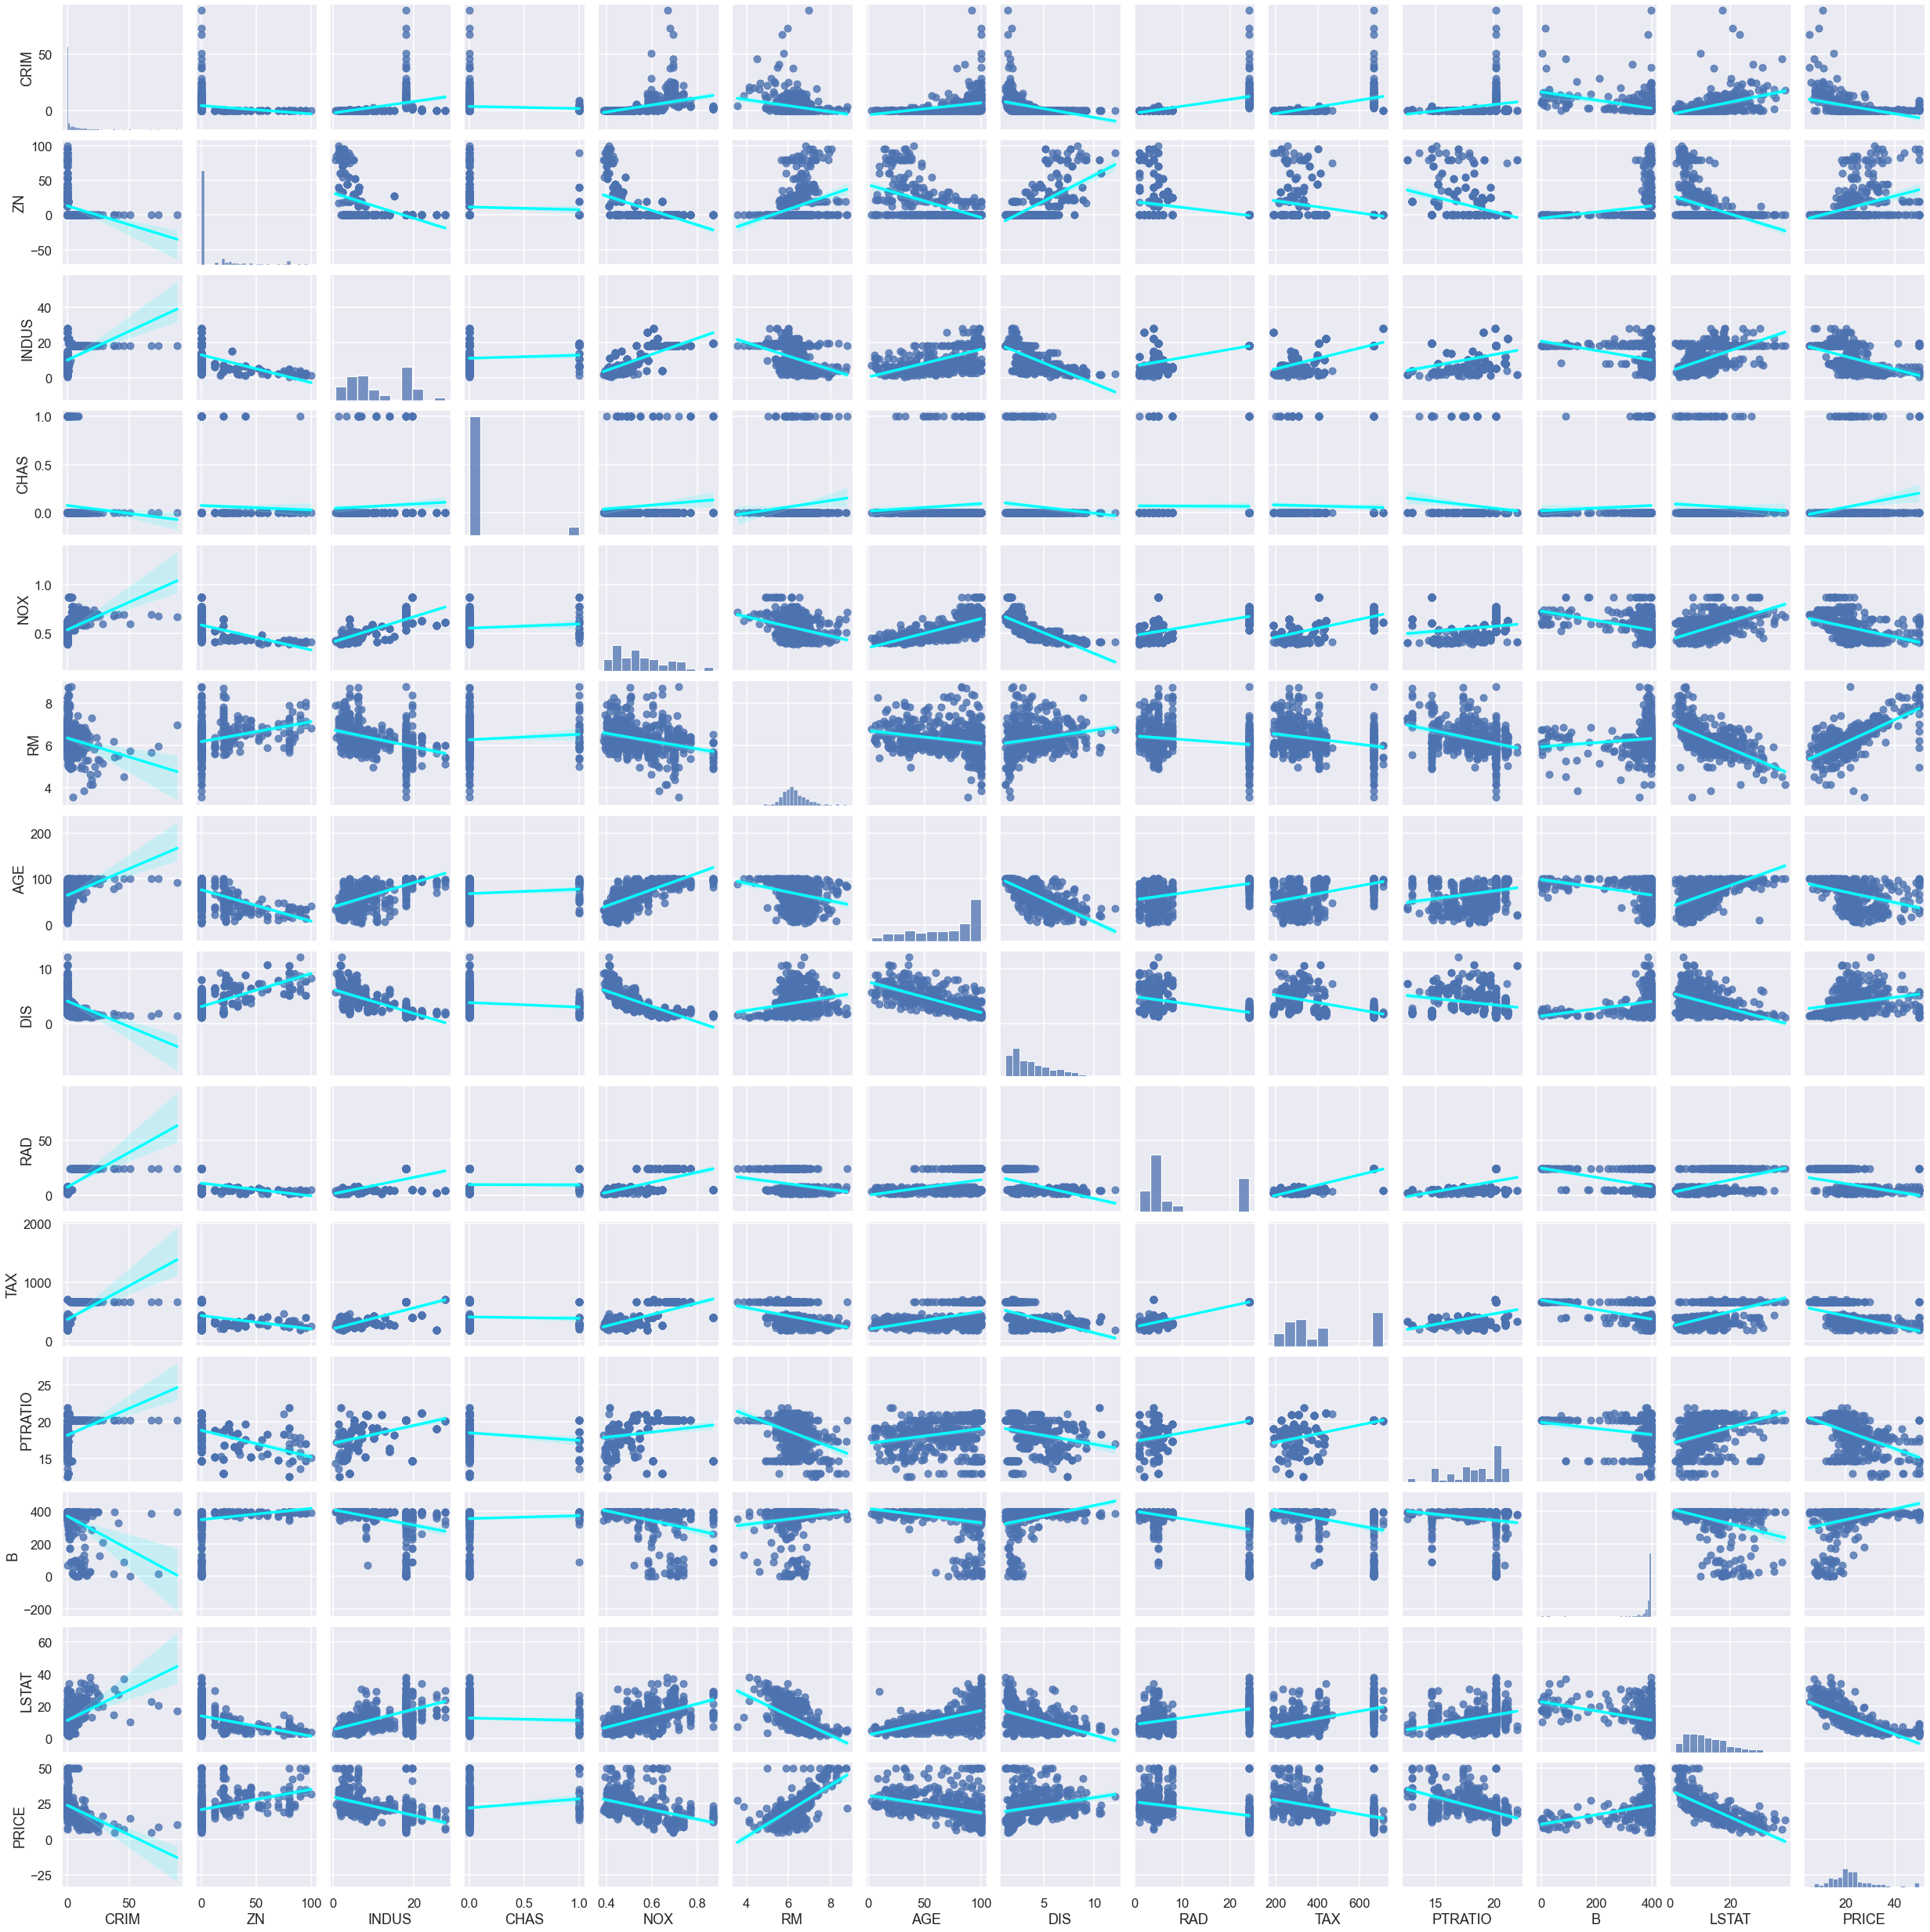

CPU times: user 1min 44s, sys: 2.14 s, total: 1min 46s
Wall time: 1min 18s


In [40]:
%%time
sns.pairplot(data, kind='reg',plot_kws={'line_kws':{'color':'cyan'}})
plt.show()

# Training and Test Dataset split

In [23]:
prices = data['PRICE']
features = data.drop('PRICE', axis = 1)

X_train, X_test, y_train,y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

In [24]:
# % of test size
len(X_test)/len(prices)

0.2015810276679842

In [25]:
# % of train size
X_train.shape[0]/features.shape[0]

0.7984189723320159

## Multivariable Regression

In [26]:
regr = LinearRegression()
regr.fit(X_train, y_train)


print ('Traning data r-squared', regr.score(X_train, y_train))
print ('Test data r-squared', regr.score(X_test, y_test))

print ('Intercept', regr.intercept_)
pd.DataFrame(data = regr.coef_, index = X_train.columns, columns =['coef'])

Traning data r-squared 0.750121534530608
Test data r-squared 0.6709339839115628
Intercept 36.53305138282439


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


## Data Transformations

In [27]:
data['PRICE'].skew()

1.1080984082549072

In [28]:
y_log = np.log(data['PRICE'])
y_log.tail()

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, dtype: float64

In [29]:
y_log.head()

0    3.178054
1    3.072693
2    3.546740
3    3.508556
4    3.589059
Name: PRICE, dtype: float64

In [30]:
y_log.skew()

-0.33032129530987864

/Users/mrsuperb/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


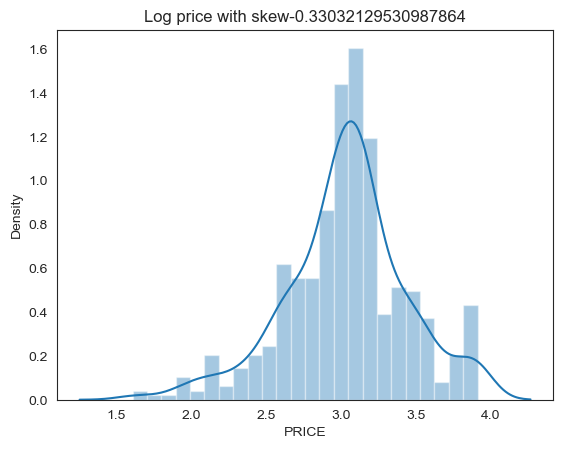

In [36]:
sns.distplot(y_log)
plt.title(f'Log price with skew{y_log.skew()}')
plt.show()

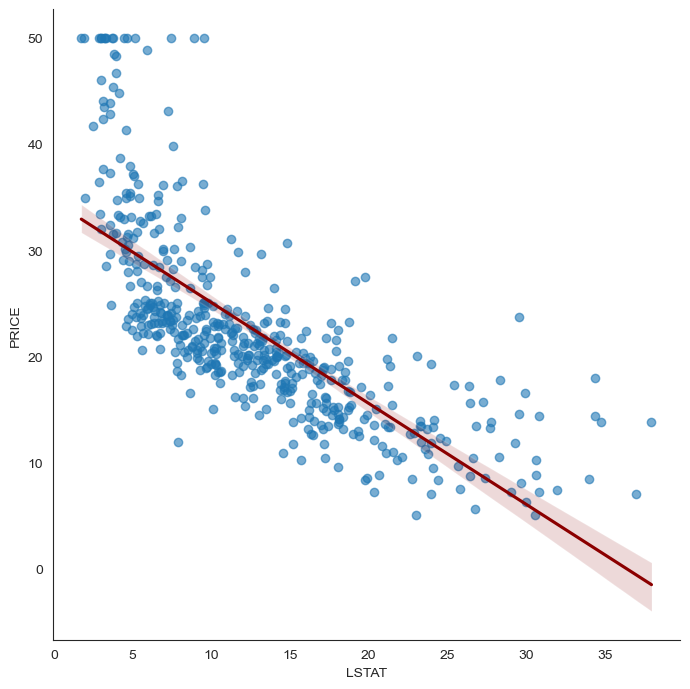

In [39]:
sns.lmplot(x='LSTAT',y='PRICE',data=data, height =7,scatter_kws={'alpha':0.6},line_kws ={'color':'darkred'})
plt.show()

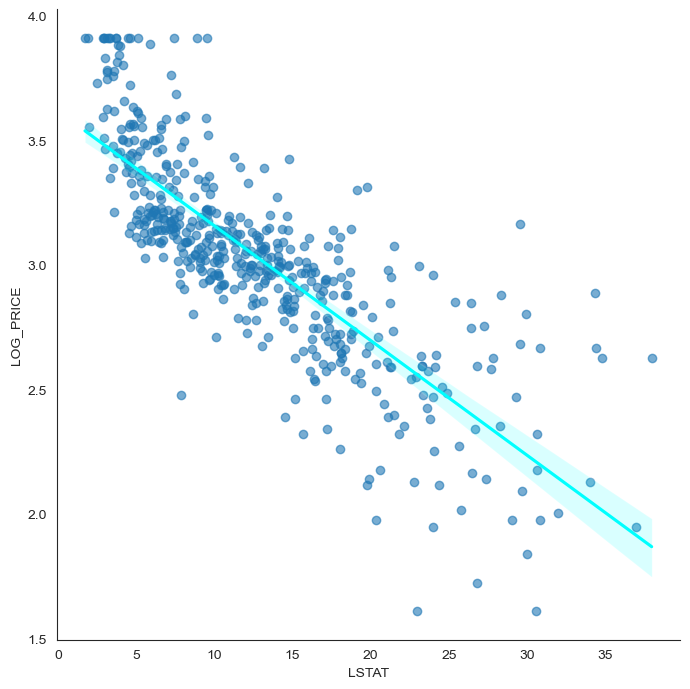

In [40]:
transformed_data = features
transformed_data['LOG_PRICE'] = y_log
sns.lmplot(x='LSTAT',y='LOG_PRICE',data=transformed_data, height =7,scatter_kws={'alpha':0.6},line_kws ={'color':'cyan'})
plt.show()

## Regression using Log prices

In [41]:
prices = np.log(data['PRICE']) #Using log prices
features = data.drop('PRICE', axis = 1)

X_train, X_test, y_train,y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, y_train)


print ('Traning data r-squared', regr.score(X_train, y_train))
print ('Test data r-squared', regr.score(X_test, y_test))

print ('Intercept', regr.intercept_)
pd.DataFrame(data = regr.coef_, index = X_train.columns, columns =['coef'])

Traning data r-squared 0.7930234826697583
Test data r-squared 0.7446922306260724
Intercept 4.05994387177519


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [42]:
#Charles River property premium
np.e**0.080331

1.0836456950439142

## p-value & Evaluating coefficients

In [47]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train,X_incl_const) # OLS = ordinary least square
result = model.fit()

#result.params
#result.pvalues

pd.DataFrame({'coef':result.params,'p-values':round(result.pvalues, 3)})

,coef,p-values
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


## Testing for Multicollinearity

$$ TAX = \alpha_0 + \alpha_1 RM+ \alpha_2 NOX + ... + \alpha_{12} LSTAT$$

$$ VIF_{TAX} = \frac{1}{(1-R_{TAX}^2)} $$

In [51]:
variance_inflation_factor(exog=X_incl_const.values, exog_idx=1)

1.7145250443932485

In [56]:
X_incl_const.shape[1]

14

In [58]:
vif = [] #Create empty list for vif
for i in range(len(X_incl_const.columns)):
    vif.append(variance_inflation_factor(exog=X_incl_const.values, exog_idx=i))
print(vif)

[597.5487126763895, 1.7145250443932485, 2.3328224265597584, 3.943448822674636, 1.0788133385000576, 4.410320817897634, 1.8404053075678568, 3.3267660823099408, 4.222923410477865, 7.314299817005058, 8.508856493040817, 1.839911632651406, 1.3386713255364715, 2.812544292793034]


In [64]:
#Shorter way
vif = [variance_inflation_factor(exog=X_incl_const.values, exog_idx=i)
       for i in range(X_incl_const.shape[1])]

pd.DataFrame({'coef_name':X_incl_const.columns,'vif':np.around(vif, 2)})

,coef_name,vif
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


## Model Simplification and Baysian Information Criterion

In [72]:
#Original model with log prices and all feature

X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train,X_incl_const) # OLS = ordinary least square
result = model.fit()

org_coef = pd.DataFrame({'coef':result.params,'p-values':round(result.pvalues, 3)})

print ('BIC' ,result.bic)
print ('R-squared' ,result.rsquared)

BIC -139.74997769478875
R-squared 0.7930234826697582


In [71]:
#Reduce model #1 excluding INDUS

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS'], axis = 1)

model = sm.OLS(y_train,X_incl_const) # OLS = ordinary least square
result = model.fit()

coef_minus_INDUS = pd.DataFrame({'coef':result.params,'p-values':round(result.pvalues, 3)})
 
print ('BIC' ,result.bic)
print ('R-squared' ,result.rsquared)

BIC -145.14508855591163
R-squared 0.7927126289415163


In [73]:
#Reduce model #2 excluding INDUS and AGE

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS','AGE'], axis = 1)

model = sm.OLS(y_train,X_incl_const) # OLS = ordinary least square
result = model.fit()

coef_minus_INDUS_AGE = pd.DataFrame({'coef':result.params,'p-values':round(result.pvalues, 3)})

print ('BIC' ,result.bic)
print ('R-squared' ,result.rsquared)

BIC -149.49934294224656
R-squared 0.7918657661852815


In [74]:
frames = [org_coef,coef_minus_INDUS,coef_minus_INDUS_AGE]
pd.concat(frames, axis=1)

,coef,p-values,coef,p-values,coef,p-values
const,4.059944,0.000,4.056231,0.000,4.035922,0.000
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
ZN,0.001579,0.009,0.001551,0.010,0.001461,0.014
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
RM,0.073404,0.000,0.071739,0.000,0.076133,0.000
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000


## Residuals and Residual plots

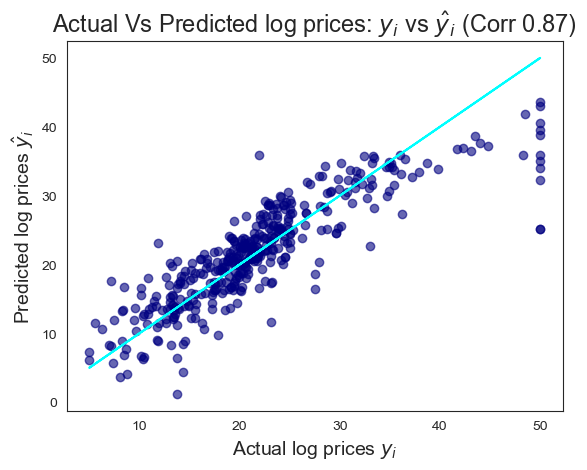

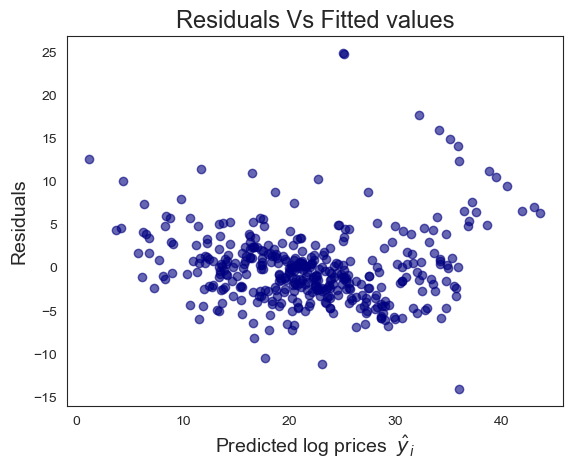

In [100]:
# Modified model: transformed (using log prices) & Simplified (dropping two features)

prices = data['PRICE'] #Using log prices
features = data.drop(['PRICE','INDUS','AGE'], axis = 1)

X_train, X_test, y_train,y_test = train_test_split(features, prices, test_size=0.2, random_state=10)


# Using stats model

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train,X_incl_const) # OLS = ordinary least square
result = model.fit()

# Residuals

# residuals = y_train - result.fittedvalues
#result.resid #Same method

# Graph of actual prices vs predicted prices
corr = round(y_train.corr(result.fittedvalues), 2)
corr

plt.scatter(x=y_train, y=result.fittedvalues, c = 'navy', alpha = 0.6)
plt.plot(y_train,y_train, color ='cyan')

plt.xlabel('Actual log prices $y _i$', fontsize =14)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize =14)
plt.title(f'Actual Vs Predicted log prices: $y _i$ vs $\hat y _i$ (Corr {corr})', fontsize =17)
plt.show()

plt.scatter(x=result.fittedvalues, y=result.resid, c = 'navy', alpha = 0.6)

plt.xlabel('Predicted log prices  $\hat y _i$', fontsize =14)
plt.ylabel('Residuals', fontsize =14)
plt.title('Residuals Vs Fitted values', fontsize =17)
plt.show()



In [ ]:
# Mean squared error & r-squared
reduced_log_mse = round(result.mse_resid, 3)
reduced_log_raquared = round(result.rsquared, 3)

/Users/mrsuperb/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


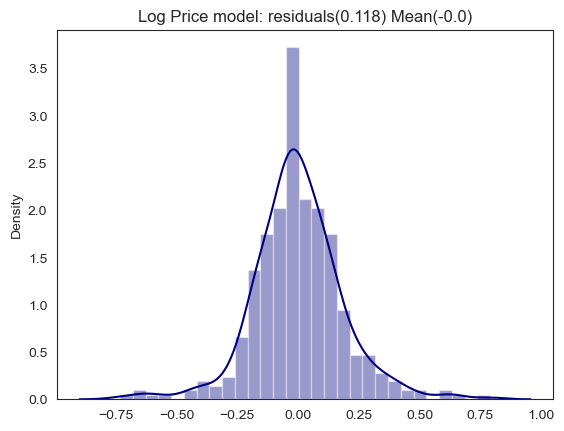

In [96]:
#Distribution on residuals (log prices) - checking for normality
resid_mean = round(result.resid.mean(), 3)
resid_skew = round(result.resid.skew(), 3)

sns.distplot(result.resid,color = 'navy')
plt.title(f'Log Price model: residuals({resid_skew}) Mean({resid_mean})')
plt.show()

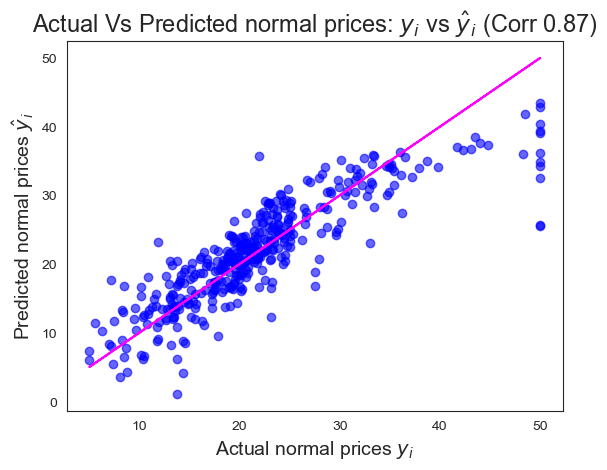

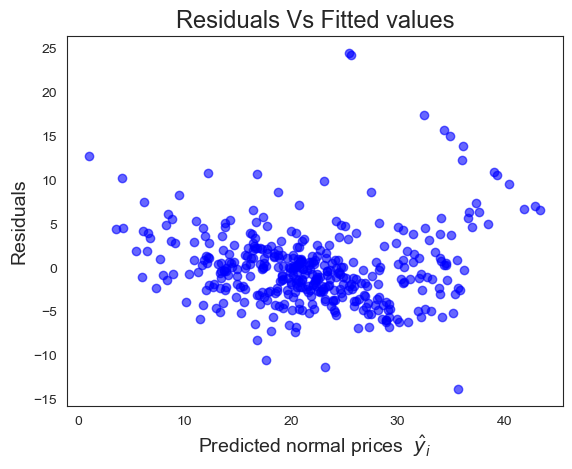

/Users/mrsuperb/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


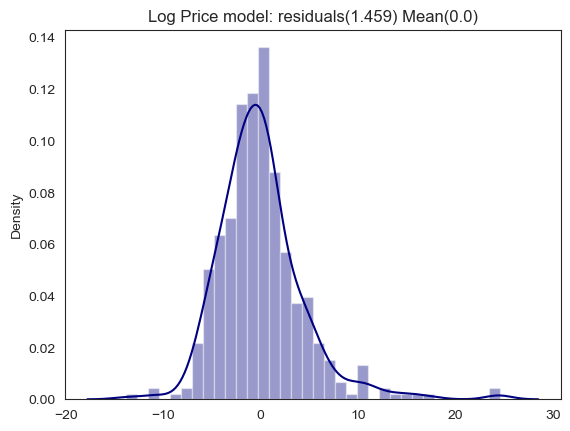

In [98]:
# CHALLENGE (normal prices with all the features)

#prices = np.log(data['PRICE']) #Using log prices
#features = data.drop(['PRICE','INDUS','AGE'], axis = 1)
prices = data['PRICE']
features = data.drop('PRICE', axis = 1)

X_train, X_test, y_train,y_test = train_test_split(features, prices, test_size=0.2, random_state=10)


# Using stats model

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train,X_incl_const) # OLS = ordinary least square
result = model.fit()

# Residuals

# Graph of actual prices vs predicted prices
corr = round(y_train.corr(result.fittedvalues), 2)
corr

plt.scatter(x=y_train, y=result.fittedvalues, c = 'blue', alpha = 0.6)
plt.plot(y_train,y_train, color ='magenta')

plt.xlabel('Actual normal prices $y _i$', fontsize =14)
plt.ylabel('Predicted normal prices $\hat y _i$', fontsize =14)
plt.title(f'Actual Vs Predicted normal prices: $y _i$ vs $\hat y _i$ (Corr {corr})', fontsize =17)
plt.show()

plt.scatter(x=result.fittedvalues, y=result.resid, c = 'blue', alpha = 0.6)

plt.xlabel('Predicted normal prices  $\hat y _i$', fontsize =14)
plt.ylabel('Residuals', fontsize =14)
plt.title('Residuals Vs Fitted values', fontsize =17)
plt.show()

# Residual Vs Predicted Values

#Distribution on residuals (log prices) - checking for normality
resid_mean = round(result.resid.mean(), 3)
resid_skew = round(result.resid.skew(), 3)

sns.distplot(result.resid,color = 'navy')
plt.title(f'Log Price model: residuals({resid_skew}) Mean({resid_mean})')
plt.show()